In [0]:
import smote_variants as sv
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import imbalanced_databases as imbd
from sklearn import metrics
from sklearn.datasets import load_wine

%matplotlib inline
from sklearn.model_selection import train_test_split

In [0]:
df_train = pd.read_csv('/content/drive/My Drive/Major Project Works/dataset/ml_dataset.csv')

In [0]:
df = df_train.copy()
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [0]:
df_attack = df[df['attack'] == 1]

In [0]:
df_normal = df[df['attack'] == 0]

In [0]:
df_attack = df_attack.sample(n=200000)

In [0]:
df = df_attack.append(df_normal, ignore_index=True, sort=False)

In [8]:
df

,pkts,bytes,dur,average_dur,stddev_dur,total_dur,min_dur,max_dur,spkts,dpkts,sbytes,dbytes,rate,srate,drate,TnBPSrcIP,TnBPDstIP,TnP_PSrcIP,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
0,7,420,12.133525,2.689915,1.902059,8.069744,0.000000,4.038417,7,0,420,0,0.494498,0.494498,0.000000,35280,42000,588,700,700,700,0.576914,0.576659,100,84,0.576914,0.576659,700,588,1
1,9,1010,16.118649,2.835775,1.871438,8.507324,0.197346,4.335104,7,2,890,120,0.496320,0.372240,0.125450,98380,99612,872,880,880,880,0.552154,0.547033,100,98,0.558359,0.547033,872,872,1
2,4,616,39.214909,0.840302,1.188366,2.520905,0.000000,2.520905,4,0,616,0,0.076502,0.076502,0.000000,53592,63160,348,426,426,426,0.102002,0.110796,100,87,0.102002,0.110796,348,348,1
3,8,856,11.495111,3.860351,0.005955,7.720701,3.854396,3.866305,6,2,736,120,0.608954,0.434968,0.131082,80048,81280,720,728,728,728,0.640216,0.635320,100,98,0.695948,0.635320,720,720,1
4,7,890,12.280018,2.074457,1.472787,6.223372,0.000000,3.273309,6,1,830,60,0.488599,0.407166,0.000000,76540,86844,602,686,686,686,0.570029,0.566089,100,86,0.570032,0.566089,686,602,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200472,2,397,0.293476,0.293476,0.000000,0.293476,0.293476,0.293476,1,1,106,291,3.407434,0.000000,0.000000,48697,694,190,4,142,122,9.493260,6.832010,2,74,6.814870,9.493260,4,122,0
200473,2,297,0.292003,0.292003,0.000000,0.292003,0.292003,0.292003,1,1,106,191,3.424622,0.000000,0.000000,48697,694,190,4,142,122,9.493260,6.832010,2,74,6.849240,9.493260,4,122,0
200474,2,337,0.277896,0.277896,0.000000,0.277896,0.277896,0.277896,1,1,100,237,3.598469,0.000000,0.000000,48697,337,190,2,142,122,9.493260,7.196940,1,74,7.196940,9.493260,2,122,0
200475,2,936,0.280742,0.280742,0.000000,0.280742,0.280742,0.280742,1,1,91,845,3.561990,0.000000,0.000000,48697,1872,190,4,142,122,9.493260,7.126890,2,74,7.123980,9.493260,4,122,0


1    200000
0       477
Name: attack, dtype: int64

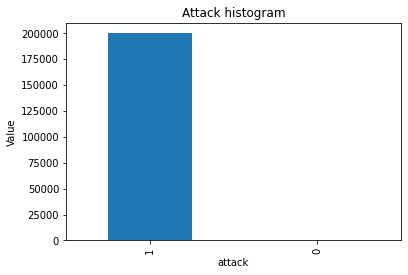

In [9]:
pd.value_counts(df['attack']).plot.bar()
plt.title('Attack histogram')
plt.xlabel('attack')
plt.ylabel('Value')
df['attack'].value_counts()

In [0]:
X = df.iloc[:, df.columns != 'attack']
y = df.iloc[:, df.columns == 'attack']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix:
 [[   97     1]
 [    1 39997]]


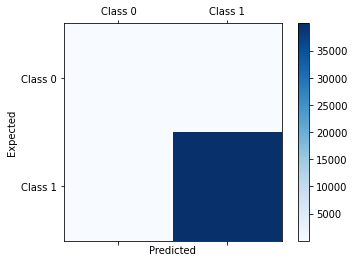

In [40]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [41]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.9999501197126895


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        98
           1       1.00      1.00      1.00     39998

    accuracy                           1.00     40096
   macro avg       0.99      0.99      0.99     40096
weighted avg       1.00      1.00      1.00     40096



In [0]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [44]:
auc = roc_auc_score(y_test, y_pred)
auc

0.9948854585586422

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

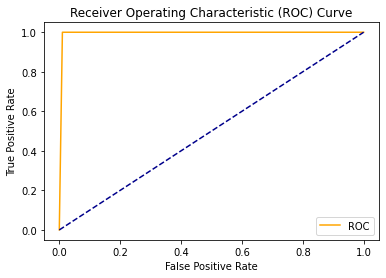

In [46]:
plot_roc_curve(fpr, tpr)